In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns

In [2]:
airline_df = pd.read_csv('./Data/airline_data.csv')

In [3]:
print(airline_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0.1                       129880 non-null  int64  
 1   Unnamed: 0                         129880 non-null  int64  
 2   id                                 129880 non-null  int64  
 3   Gender                             129880 non-null  object 
 4   Customer Type                      129880 non-null  object 
 5   Age                                129880 non-null  int64  
 6   Type of Travel                     129880 non-null  object 
 7   Class                              129880 non-null  object 
 8   Flight Distance                    129880 non-null  int64  
 9   Inflight wifi service              129880 non-null  int64  
 10  Departure/Arrival time convenient  129880 non-null  int64  
 11  Ease of Online booking             1298

In [4]:
airline_df.head()

Unnamed: 0.1  Unnamed: 0      id  Gender      Customer Type  Age  \
0             0           0   70172    Male     Loyal Customer   13   
1             1           1    5047    Male  disloyal Customer   25   
2             2           2  110028  Female     Loyal Customer   26   
3             3           3   24026  Female     Loyal Customer   25   
4             4           4  119299    Male     Loyal Customer   61   

    Type of Travel     Class  Flight Distance  Inflight wifi service  ...  \
0  Personal Travel  Eco Plus              460                      3  ...   
1  Business travel  Business              235                      3  ...   
2  Business travel  Business             1142                      2  ...   
3  Business travel  Business              562                      2  ...   
4  Business travel  Business              214                      3  ...   

   Inflight entertainment  On-board service  Leg room service  \
0                       5                 4                 3   
1                       1                 1                 5   
2                       5                 4                 3   
3                       2                 2                 5   
4                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  \
0                          25                      18.0   
1                           1                       6.0   
2                           0                       0.0   
3                          11                       9.0   
4                           0                       0.0   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied  

[5 rows x 26 columns]

In [5]:
import plotly.graph_objects as go

import numpy as np
business = airline_df[airline_df.Class == 'Business']["satisfaction"]
eco = airline_df[airline_df.Class == 'Eco']["satisfaction"]
eco_plus = airline_df[airline_df.Class == 'Eco Plus']["satisfaction"]

fig = go.Figure()
fig.add_trace(go.Histogram(y=business, name='Business', xbins=dict(start=-4.0, end=3.0, size=0.5)))
fig.add_trace(go.Histogram(y=eco, name='Eco', xbins=dict(start=-3.0, end=4, size=0.5)))
fig.add_trace(go.Histogram(y=eco_plus, name='Eco Plus', xbins=dict(start=-3.0, end=4, size=0.5)))

fig.update_layout(title_text='Satisfaction Based on Class', xaxis_title_text='Count', yaxis_title_text='Satisfaction', bargap=0.2, bargroupgap=0.1)

fig.show()

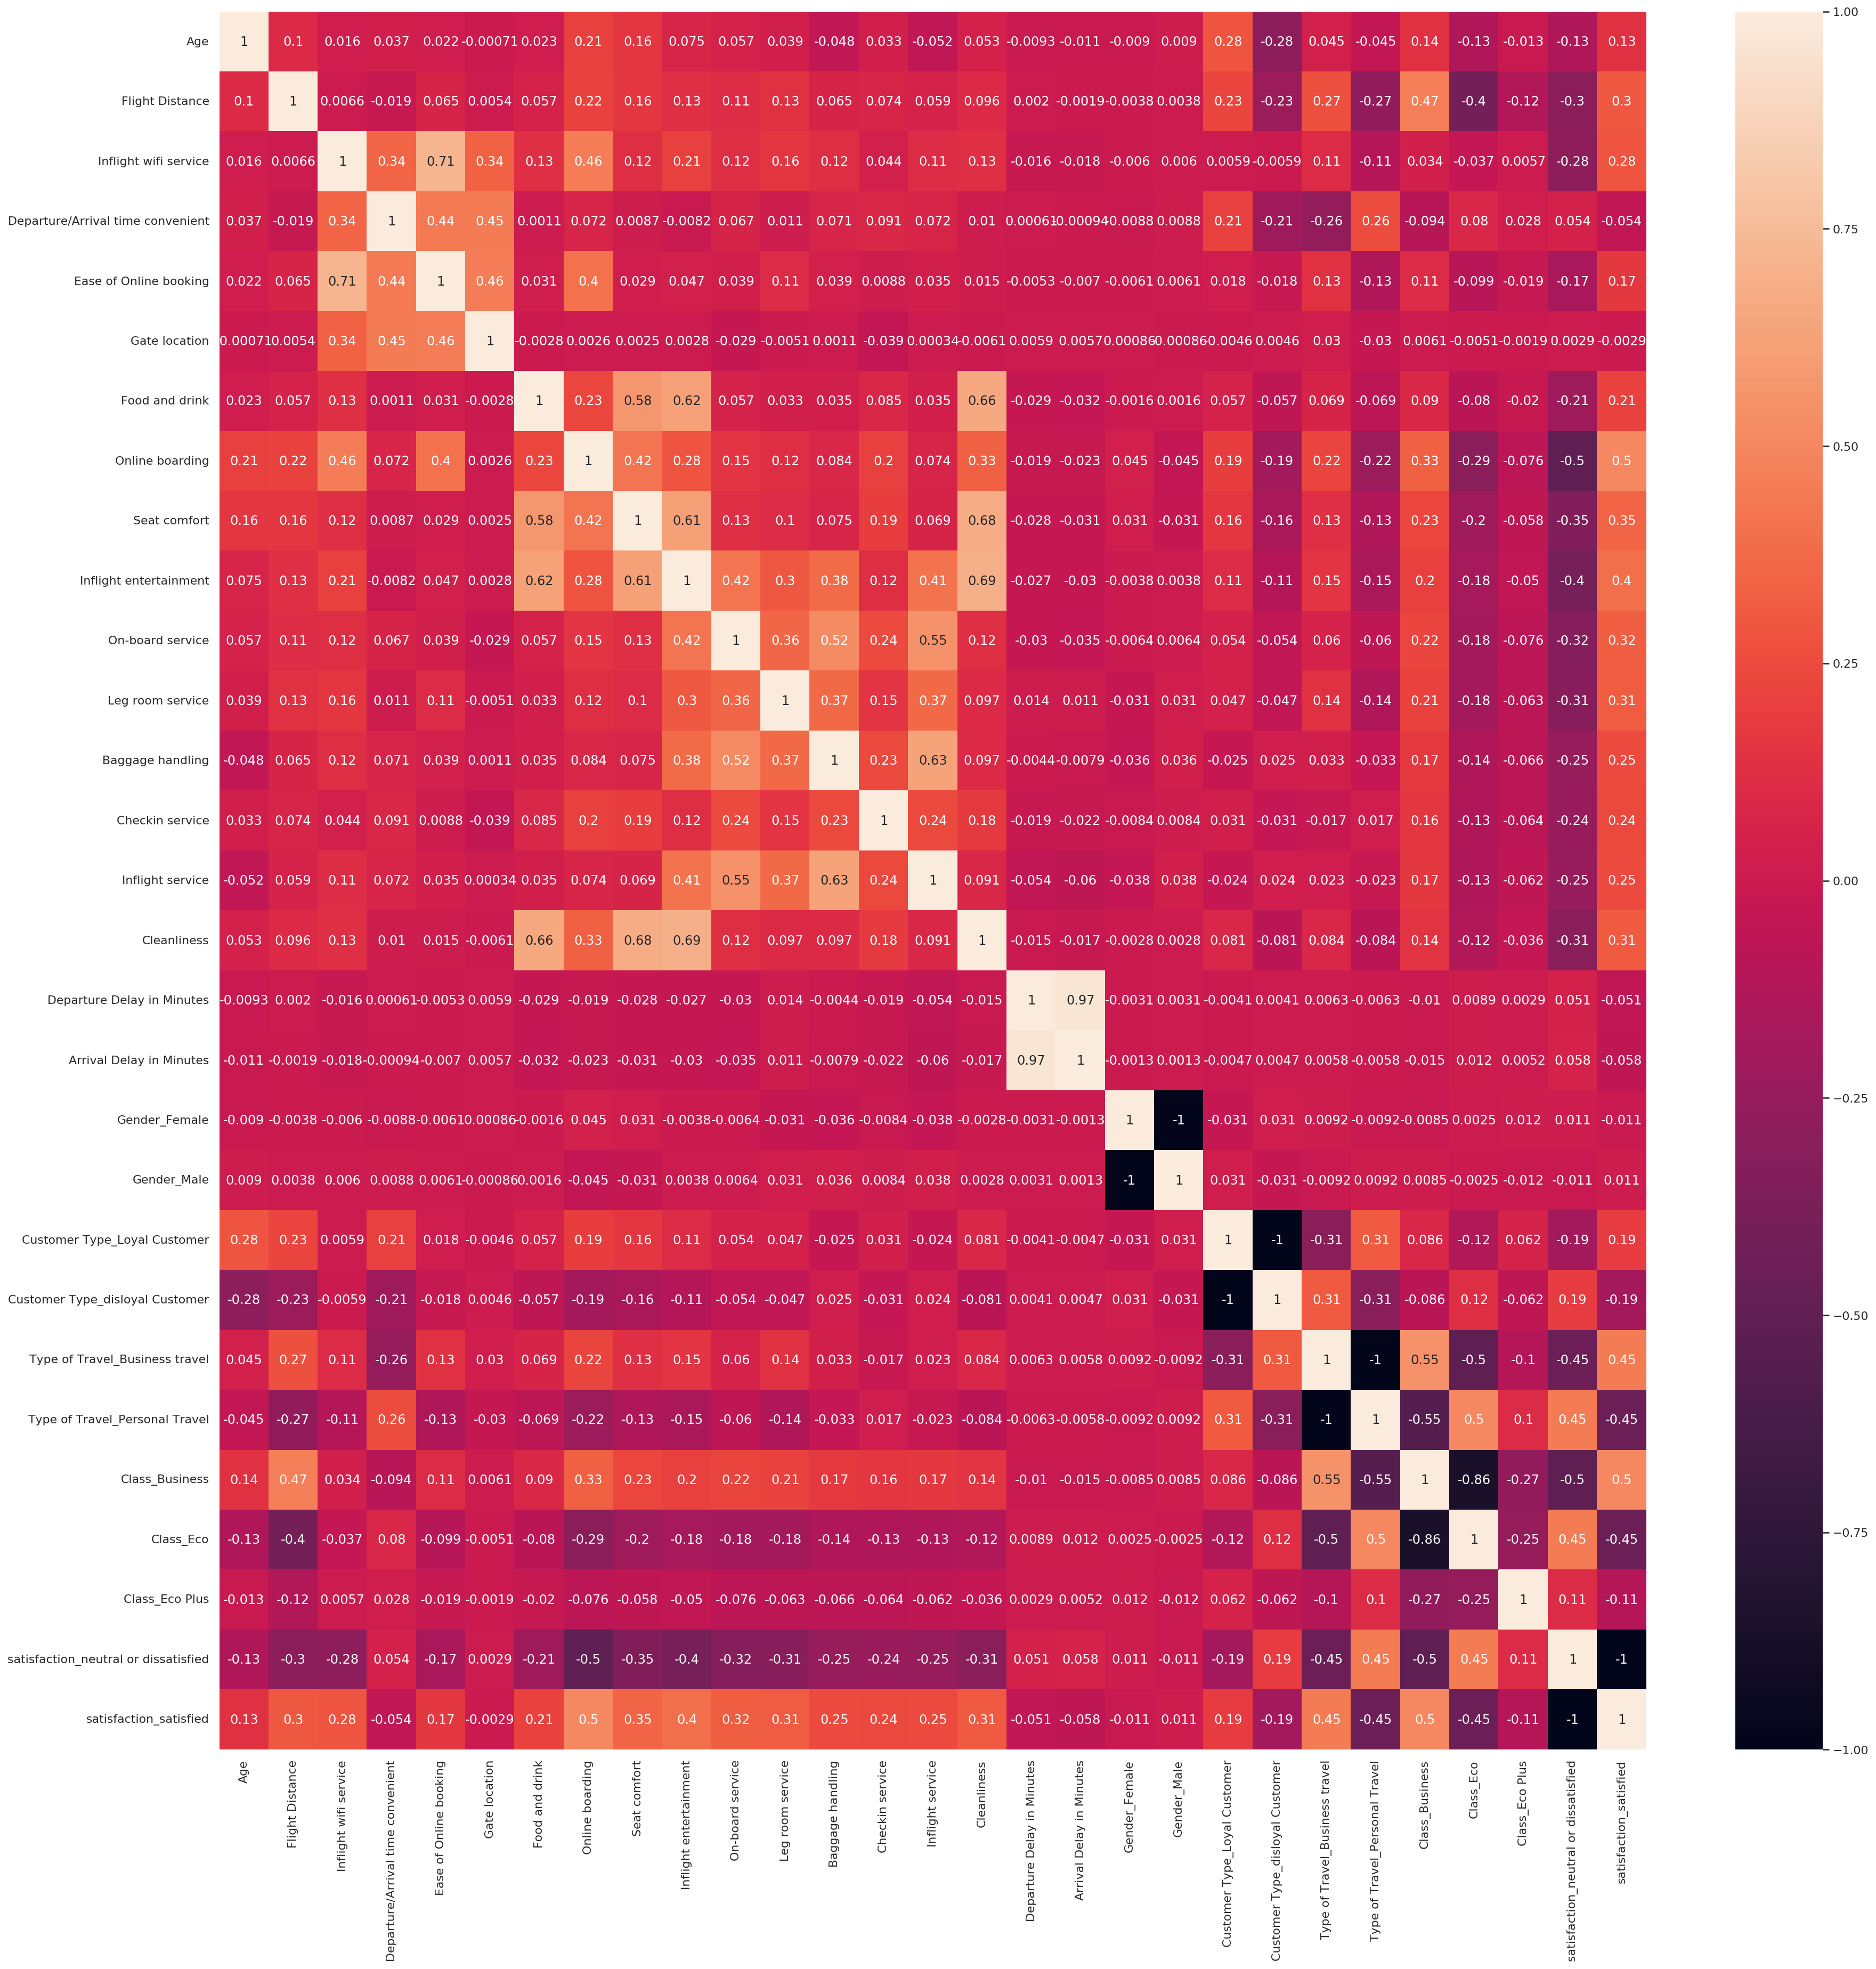

In [7]:
#airline_df.dropna(inplace = True)
#dropcolumns = ["Unnamed: 0.1", "Unnamed: 0", "id"]
#airline_df.drop(dropcolumns, axis = 1, inplace = True)
sns.set(rc = {'figure.figsize':(30,30)})
sns.heatmap(pd.get_dummies(airline_df, prefix = None, prefix_sep = '_', dummy_na = False, columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class','satisfaction'], sparse = False, drop_first = False, dtype = None).corr(), annot=True)

In [8]:
fig2 = px.scatter(airline_df, x="Departure Delay in Minutes", y="Arrival Delay in Minutes",size="Departure/Arrival time convenient",color="Type of Travel")
fig2.show()

In [32]:
stuff=pd.get_dummies(airline_df, prefix = None, prefix_sep = '_', dummy_na = False, columns = ['satisfaction'], sparse = False, drop_first = False, dtype = None)
stuff["satisfaction_satisfied"]+=1
fig2 = px.scatter(stuff, x="Flight Distance", y="Arrival Delay in Minutes",size = "satisfaction_satisfied", color="Customer Type")
fig2.show()